##### Necessary Imports for the Project

In [ ]:
library(stats) # for hypothesis testing, linear regression
library(readr) # for read_csv
library(ggplot2) # for data visualization
library(BSDA) # for z.test

##### Loading & printing and cleaning the Data & info

In [3]:
data <- read_csv("nba_data.csv")
head(data)
summary(data)
dim(data)

Rows: 3922 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): height, weight, born

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


height,weight,born
<dbl>,<dbl>,<dbl>
180,77,1918
188,83,1921
193,86,1924
196,88,1925
178,79,1927
180,79,1926


     height          weight            born     
 Min.   :160.0   Min.   : 60.00   Min.   :1913  
 1st Qu.:190.0   1st Qu.: 86.00   1st Qu.:1948  
 Median :198.0   Median : 95.00   Median :1964  
 Mean   :198.7   Mean   : 94.78   Mean   :1962  
 3rd Qu.:206.0   3rd Qu.:102.00   3rd Qu.:1979  
 Max.   :231.0   Max.   :163.00   Max.   :1997  
 NA's   :1       NA's   :1        NA's   :1     

[1] 3922    3

##### Distributation of the Data and visualization using histogram

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_density()`)."


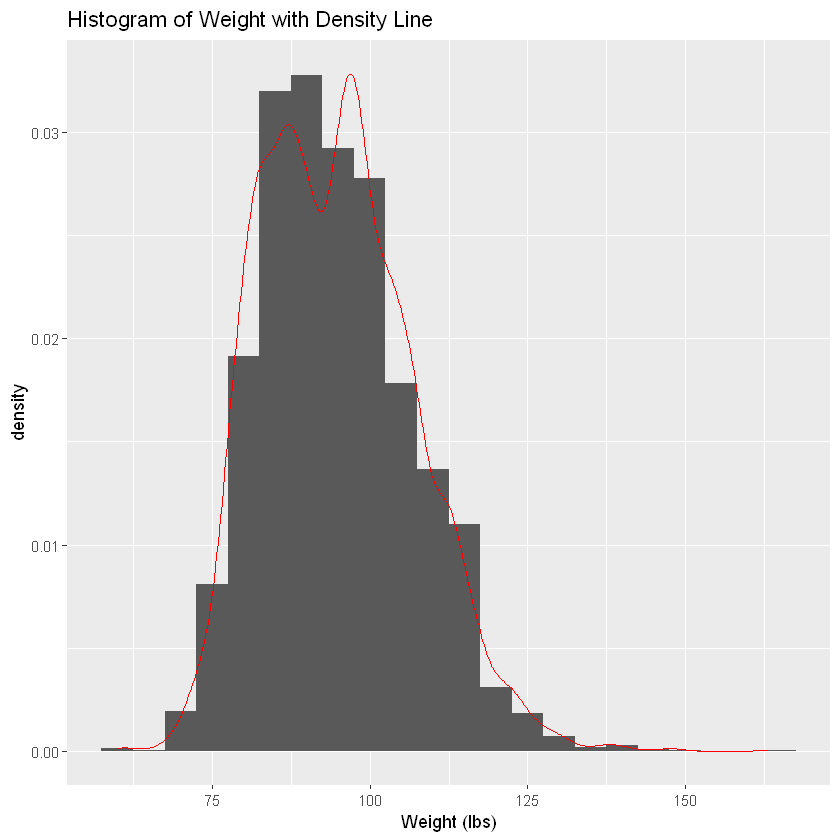

In [4]:
ggplot(data, aes(x =  weight)) +
  geom_histogram(binwidth = 5, aes(y = ..density..)) +  # Use density for consistent y-axis
  geom_line(stat = "density", color = "red") +  # Add density line
  ggtitle("Histogram of Weight with Density Line") +
  xlab("Weight (lbs)") 

Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_density()`)."


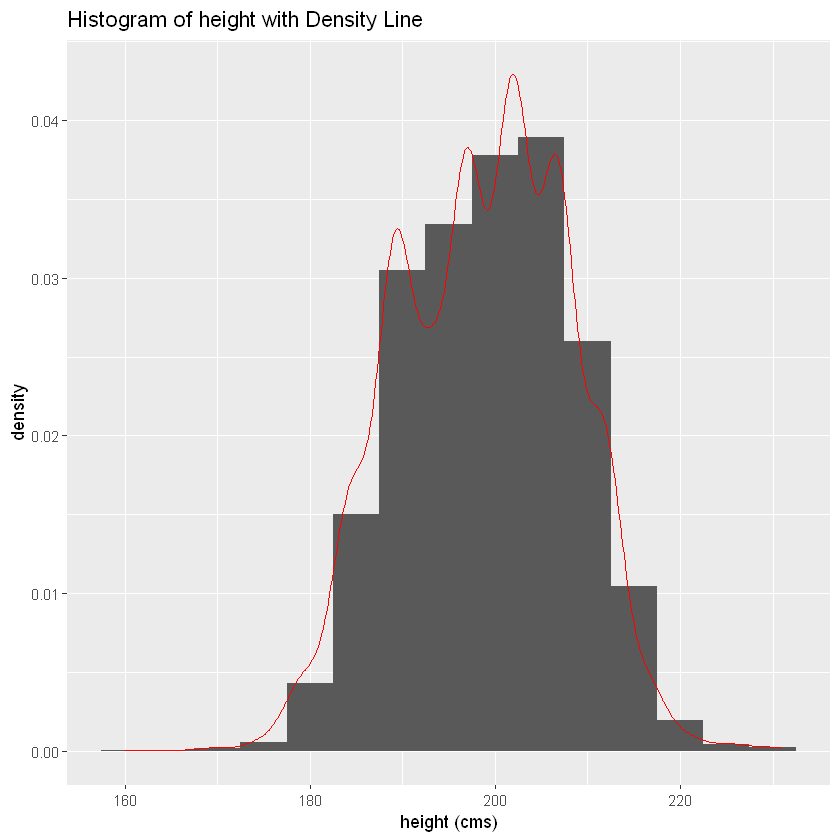

In [5]:
ggplot(data, aes(x =  height)) +
  geom_histogram(binwidth = 5, aes(y = ..density..)) +  # Use density for consistent y-axis
  geom_line(stat = "density", color = "red") +  # Add density line
  ggtitle("Histogram of height with Density Line") +
  xlab("height (cms)") 

##### Perform Shapiro-Wilk test for normality

In [6]:
shapiro.test(data$weight)
shapiro.test(data$height)


	Shapiro-Wilk normality test

data:  data$weight
W = 0.97849, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  data$height
W = 0.98625, p-value < 2.2e-16


##### Observations:
- The data is not normally distributed.
- The height data is very slightly skewed to the right.
- The weight data is slightly skewed to the left.
- The data has 3 columns and 3922 rows.

##### Preparing the data for the t-test

In [7]:
height_counts <- table(data$born)
height_counts_df <- as.data.frame(height_counts)
colnames(height_counts_df) <- c("Year", "Height Count")
sorted_height_counts <- height_counts_df[order(-height_counts_df$`Height Count`), ]
length(sorted_height_counts$Year)

[1] 84

In [8]:
heights_1991 = data$height[data$born == 1991][1:29]
heights_1969 = data$height[data$born == 1969][1:29]
length(x = heights_1991)
length(x = heights_1969)
heights_1991z = data$height[data$born == 1991]
heights_1969z = data$height[data$born == 1969]
length(x = heights_1991z)
length(x = heights_1969z)

[1] 29

[1] 29

[1] 71

[1] 74

##### Performing a T-test to check there is no significant difference of heights of players in 1969 and 1991

In [9]:
head(heights_1991)
head(heights_1969)

[1]  NA 208 198 198 190 201

[1]  NA 193 208 198 208 206

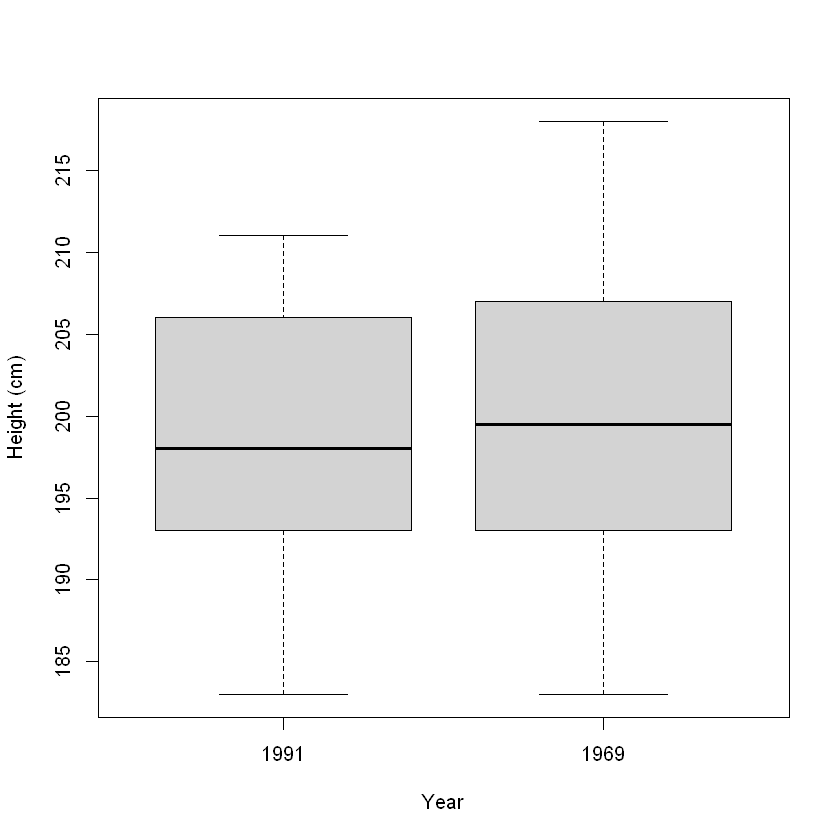

In [10]:
# prepare a boxplot
boxplot(heights_1991, heights_1969, names = c("1991", "1969"), ylab = "Height (cm)", xlab = "Year")

The box plots show that the median height of men has very slightly decreased from 1969 to 1991. Also the IQR has become smaller. This means that the heights of men are more similar to eachother in 1991 than in 1969.

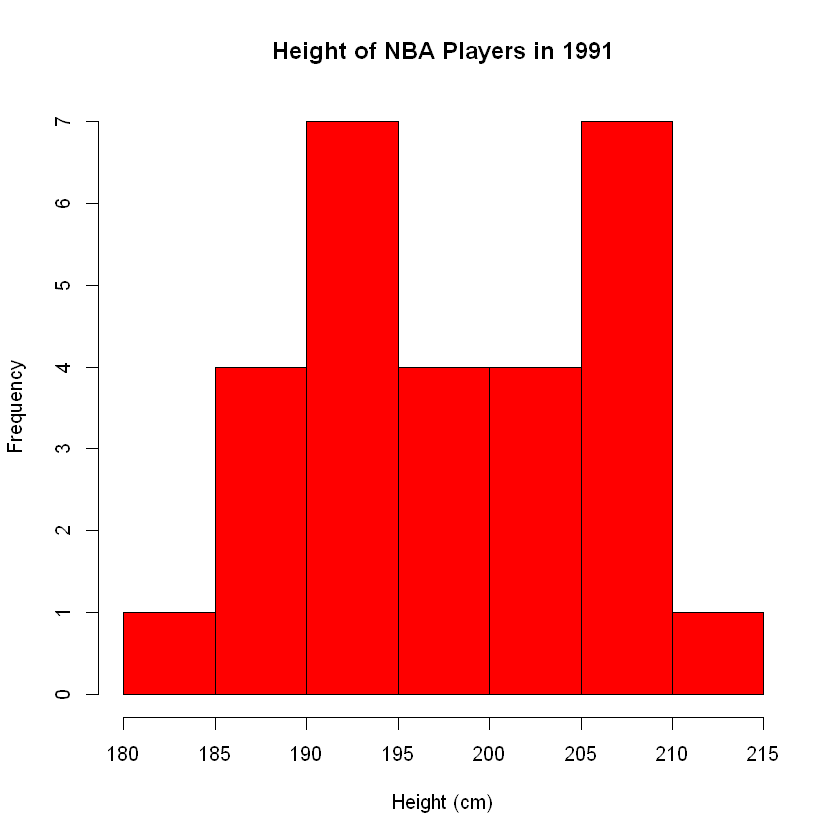

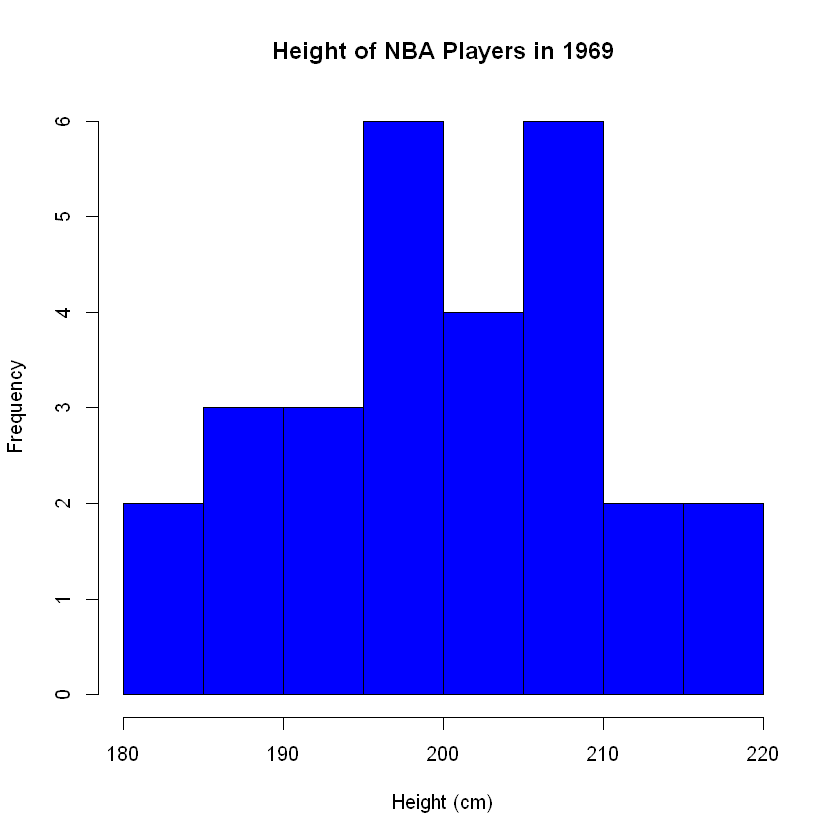

In [11]:
hist(heights_1991, col = "red", main = "Height of NBA Players in 1991", xlab = "Height (cm)")
hist(heights_1969, col = "blue", main = "Height of NBA Players in 1969", xlab = "Height (cm)")

##### Check the variations in the data before the t test

In [12]:
var.test(heights_1991, heights_1969)


	F test to compare two variances

data:  heights_1991 and heights_1969
F = 0.66193, num df = 27, denom df = 27, p-value = 0.2899
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3063169 1.4304020
sample estimates:
ratio of variances 
         0.6619338 


- The p-value of the F-test is p = 0.2899
- It is greater than the significance level alpha = 0.05. 
- In conclusion, there is **no significant** difference between the variances of the two sets of data. 
- Therefore, we can use the classic t-test, assuming equality of the two variances.

##### Performing a T-test to check there is no significant difference of heights of players in 1969 and 1991
- **Null Hypothesis**: There is no significant difference of heights of players in 1969 and 1991
- **Alternative Hypothesis**: There is significant difference of heights of players in 1969 and 1991

In [13]:
# z test just to confirm
z.test(heights_1991z, heights_1969z, alternative = "two.sided", mu = 0, sigma.x = sd(heights_1991z), sigma.y = sd(heights_1969z), conf.level = 0.95)


	Two-sample z-Test

data:  heights_1991z and heights_1969z
z = NA, p-value = NA
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 NA NA
sample estimates:
mean of x mean of y 
 198.7286  200.2740 


In [14]:
t.test(heights_1969, heights_1991, var.equal = TRUE)


	Two Sample t-test

data:  heights_1969 and heights_1991
t = 0.85275, df = 54, p-value = 0.3976
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.605646  6.462789
sample estimates:
mean of x mean of y 
 200.1071  198.1786 


- Based on the p-value **0.3976** > 0.05 (α) df and confidence interval, there is no significant difference in heights between players born in 1969 and 1991.
- **Fail to reject the null hypothesis** and accept it.
- Any observed differences are likely due to random variation.
- The mean height for players born in **1969 is 200.1071**, while for those born in **1991 is 198.1786**.

##### Performing Simple Linear Regression to predict the height of a player based on his weight

In [31]:
# prepare variables for linear regression
dependent_variable = data$weight
independent_variable = data$height

lr_data = data.frame(dependent_variable, independent_variable)
summary(data)
attach(lr_data)
head(lr_data)

     height          weight            born     
 Min.   :160.0   Min.   : 60.00   Min.   :1913  
 1st Qu.:190.0   1st Qu.: 86.00   1st Qu.:1948  
 Median :198.0   Median : 95.00   Median :1964  
 Mean   :198.7   Mean   : 94.78   Mean   :1962  
 3rd Qu.:206.0   3rd Qu.:102.00   3rd Qu.:1979  
 Max.   :231.0   Max.   :163.00   Max.   :1997  
 NA's   :1       NA's   :1        NA's   :1     

The following objects are masked _by_ .GlobalEnv:

    dependent_variable, independent_variable


The following objects are masked from lr_data (pos = 3):

    dependent_variable, independent_variable




,dependent_variable,independent_variable
,<dbl>,<dbl>
1,77,180
2,83,188
3,86,193
4,88,196
5,79,178
6,79,180


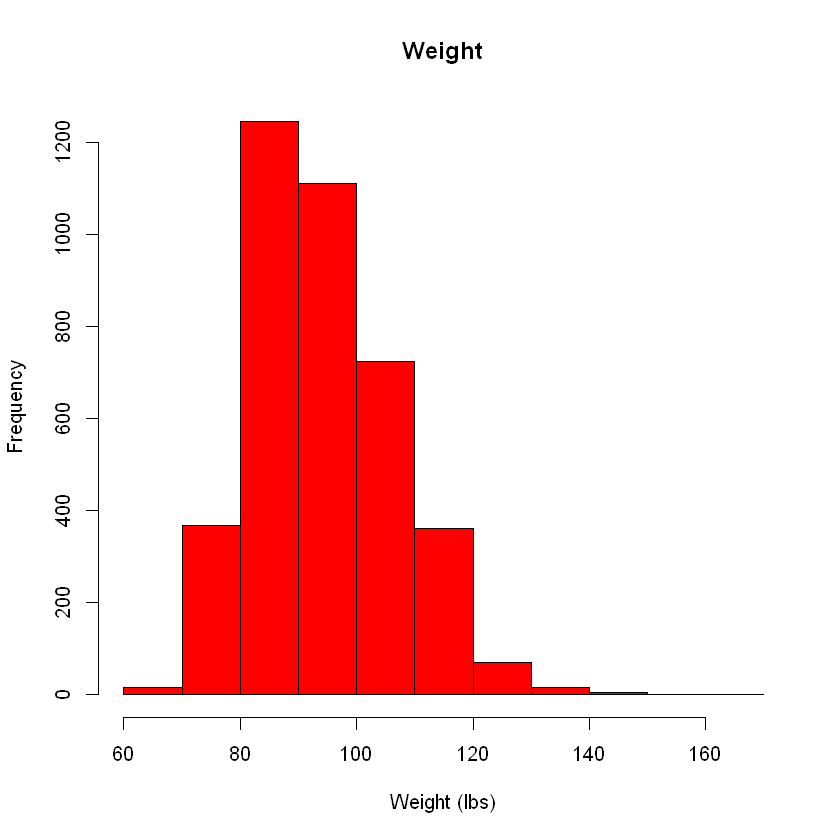

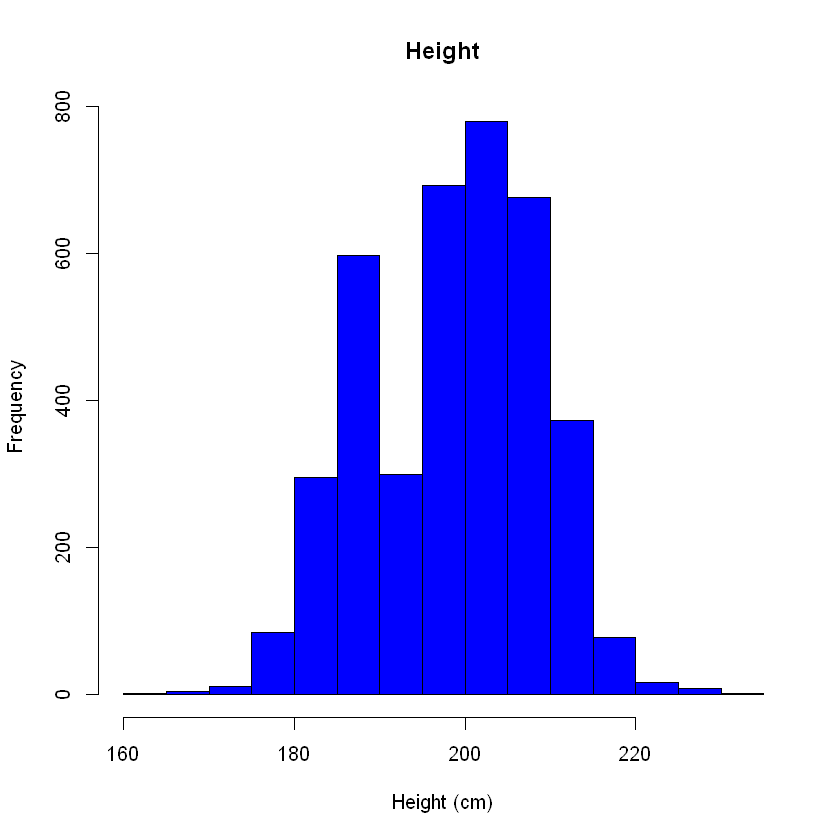

In [16]:
hist(lr_data$dependent_variable, col = "red", main = "Weight", xlab = "Weight (lbs)")
hist(lr_data$independent_variable, col = "blue", main = "Height", xlab = "Height (cm)")

##### Observations:
- The data is not normally distributed.
- The height data is very slightly skewed to the right.
- The weight data is slightly skewed to the left.

In [17]:
# check normality
shapiro.test(lr_data$dependent_variable)
shapiro.test(lr_data$independent_variable)


	Shapiro-Wilk normality test

data:  lr_data$dependent_variable
W = 0.97849, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  lr_data$independent_variable
W = 0.98625, p-value < 2.2e-16


In [18]:
# check varience
var.test(lr_data$dependent_variable, lr_data$independent_variable)


	F test to compare two variances

data:  lr_data$dependent_variable and lr_data$independent_variable
F = 1.6869, num df = 3920, denom df = 3920, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.584479 1.795873
sample estimates:
ratio of variances 
          1.686867 


##### Observations:
- There is a significant difference in varience as the p value < 0.05.

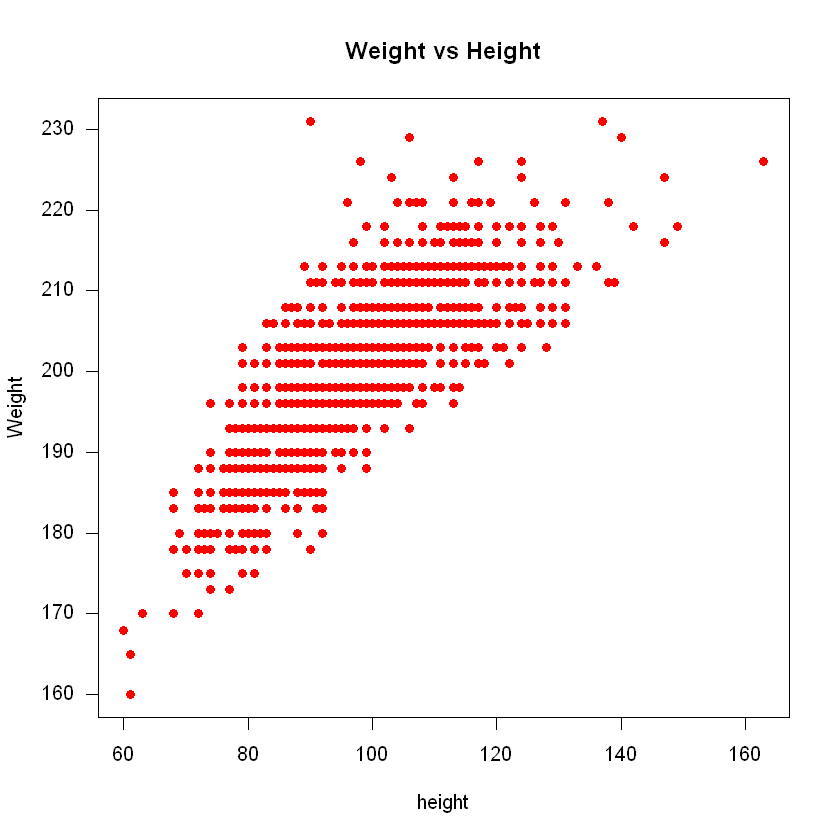

In [19]:
plot(lr_data$dependent_variable, lr_data$independent_variable, main = "Weight vs Height", xlab
= "height", ylab = "Weight", col = "red",pch =16, las = 1,lwd = 2)

- The scatterplot shows the nature of linear relationship between height and weight.
- There is a strong positive relationship between height and weight. 
- As height increases, the weight increases. 
- Thus, we many say that taller players have higher weights than shorter players atleast in NBA.

In [20]:
cor(lr_data)

,dependent_variable,independent_variable
dependent_variable,1,NA
independent_variable,NA,1


- the correlation reveals that the degree of relationship between height and weight is 1 which is a strong positive relationship.

In [21]:
x = lr_data$independent_variable
y = lr_data$dependent_variable
model = lm(x ~ y)
model


Call:
lm(formula = x ~ y)

Coefficients:
(Intercept)            y  
   138.4522       0.6357  


- The linear regression model approximates the relationship between the dependent variable and the independent variable.

- In the given model:
  - Intercept: 138.4522
  - Coefficient for the independent variable: 0.6357

- Estimated linear regression equation:
  - `dependent_variable = 138.4522 + 0.6357 * independent_variable`

- Implication: Each unit increase in the independent variable results in an expected increase of 0.6357 units in the dependent variable.

- Intercept represents the estimated dependent variable value when the independent variable is zero, here at 138.4522.


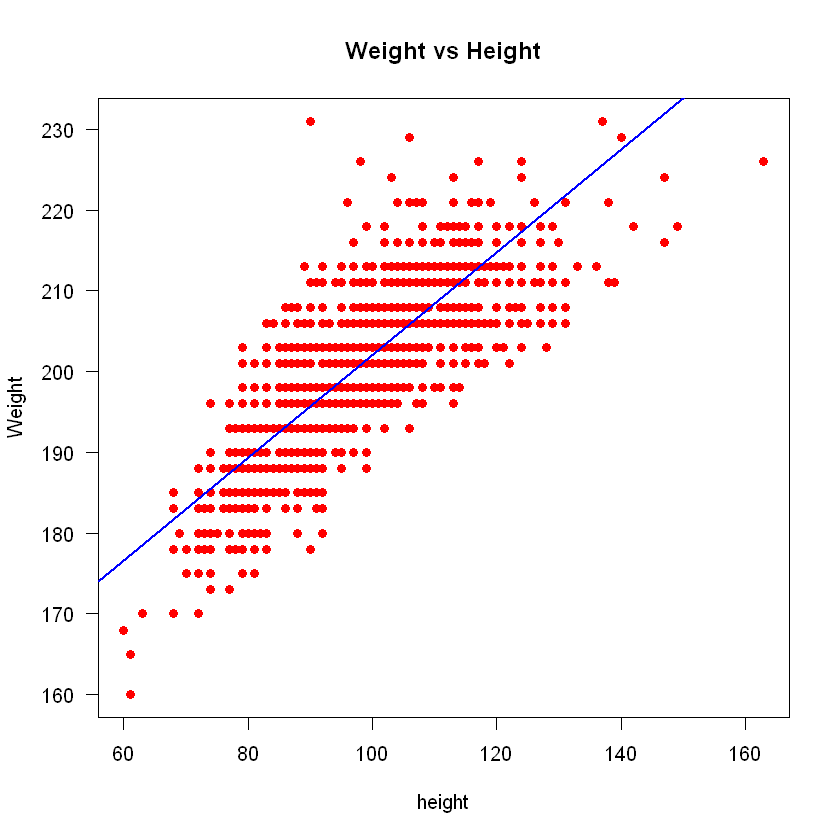

In [22]:
plot(y, x, main = "Weight vs Height", xlab
= "height", ylab = "Weight", col = "red",pch =16, las = 1,lwd = 2)
abline(model, col = "blue", lwd = 2)

In [23]:
# interpret slope and r-squared
summary(model)


Call:
lm(formula = x ~ y)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.664  -3.385  -0.122   3.436  35.336 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.385e+02  6.630e-01  208.82   <2e-16 ***
y           6.357e-01  6.939e-03   91.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.231 on 3919 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6816 
F-statistic:  8392 on 1 and 3919 DF,  p-value: < 2.2e-16


In [33]:
# predict the height of a player given their weight
predict(model, data.frame(y = 90))

1 
195.6643

In [34]:
# predict the height of a player given their weight
predict(model, data.frame(y = 200))

1 
265.5901

- **Model:**
  - Linear regression: `dependent_variable ~ independent_variable`.

- **Residuals:**
  - Range: -17.664 to 35.336 => offset 53.0.

- **Coefficients:**
  - **Intercept:** 138.5.
  - **Independent Variable (Slope):** 0.636.
  - Both highly significant (p < 0.001).

- **Standard Error:**
  - Residual standard error: 5.231 units.

- **R-squared:**
  - Multiple R-squared: 0.6817.
  - Adjusted R-squared: 0.6816.

- **Model Significance:**
  - F-statistic: 8392.
  - Model highly significant (p < 2.2e-16).
  - This implies that for each unit increase in the independent variable, the dependent variable is expected to increase by 0.636 units.
  - The intercept represents the estimated value of the dependent variable when the independent variable is zero. In this case, it is 138.5.

- **Model Drawbacks**
  - The simple linear approach is not appropriate for the given data as with a weight of 200 lbs, the height of the player is 265.59 which is not possible. so to overcome this we can use non linear regression and more data.

References:
- https://www.kaggle.com/datasets/drgilermo/nba-players-stats?resource=download&select=Players.csv